**Package Required**

In [46]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [47]:
# Loading dataset
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1.0,0,125,212.0,0,1,168,0,1.0,2.0,2,3,0
1,53,1.0,0,140,203.0,1,0,155,1,3.1,0.0,0,3,0
2,70,1.0,0,145,174.0,0,1,125,1,2.6,0.0,0,3,0
3,61,1.0,0,148,203.0,0,1,161,0,0.0,2.0,1,3,0
4,62,0.0,0,138,294.0,1,1,106,0,1.9,1.0,3,2,0


In [48]:
# Loading Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1031 non-null   int64  
 1   sex       1030 non-null   float64
 2   cp        1031 non-null   int64  
 3   trestbps  1031 non-null   int64  
 4   chol      1030 non-null   float64
 5   fbs       1031 non-null   int64  
 6   restecg   1031 non-null   int64  
 7   thalach   1031 non-null   int64  
 8   exang     1031 non-null   int64  
 9   oldpeak   1031 non-null   float64
 10  slope     1030 non-null   float64
 11  ca        1031 non-null   int64  
 12  thal      1031 non-null   int64  
 13  target    1031 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 112.9 KB


In [49]:
# Count null values in each row
null_counts_per_row = data.isnull().sum(axis=1)

# Display rows with null values and the corresponding count
rows_with_null = data[null_counts_per_row > 0]
print("Rows with null values and their counts:")
print(rows_with_null)

# Total number of rows with null values
total_rows_with_null = len(rows_with_null)
print("Total number of rows with null values:", total_rows_with_null)

# Remove rows with null values
data = data.dropna()

# Display the cleaned DataFrame
print("Cleaned DataFrame without rows containing null values:")
data.info()


Rows with null values and their counts:
      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1025   47  NaN   0       110  275.0    0        0      118      1      1.0   
1026   50  0.0   0       110    NaN    0        0      159      0      0.0   
1027   54  1.0   0       120  188.0    0        1      113      0      1.4   

      slope  ca  thal  target  
1025    1.0   1     2       0  
1026    2.0   0     2       1  
1027    NaN   1     3       0  
Total number of rows with null values: 3
Cleaned DataFrame without rows containing null values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1030
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1028 non-null   int64  
 1   sex       1028 non-null   float64
 2   cp        1028 non-null   int64  
 3   trestbps  1028 non-null   int64  
 4   chol      1028 non-null   float64
 5   fbs       1028 non-null   int64  
 6  

In [50]:
# Filter the rows where 'cp' is greater than 4
rows_to_encode = data['cp'] > 4
print(rows_to_encode)
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to the selected rows in the 'cp' column
data.loc[rows_to_encode, 'cp'] = label_encoder.fit_transform(data.loc[rows_to_encode, 'cp'])

# Display the modified DataFrame
print(data)


0       False
1       False
2       False
3       False
4       False
        ...  
1023    False
1024    False
1028     True
1029     True
1030     True
Name: cp, Length: 1028, dtype: bool
      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0      52  1.0   0       125  212.0    0        1      168      0      1.0   
1      53  1.0   0       140  203.0    1        0      155      1      3.1   
2      70  1.0   0       145  174.0    0        1      125      1      2.6   
3      61  1.0   0       148  203.0    0        1      161      0      0.0   
4      62  0.0   0       138  294.0    1        1      106      0      1.9   
...   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
1023   50  0.0   0       110  254.0    0        0      159      0      0.0   
1024   54  1.0   0       120  188.0    0        1      113      0      1.4   
1028   47  1.0   2       112  204.0    0        1      143      0      0.1   
1029   59  1.0   1       140  

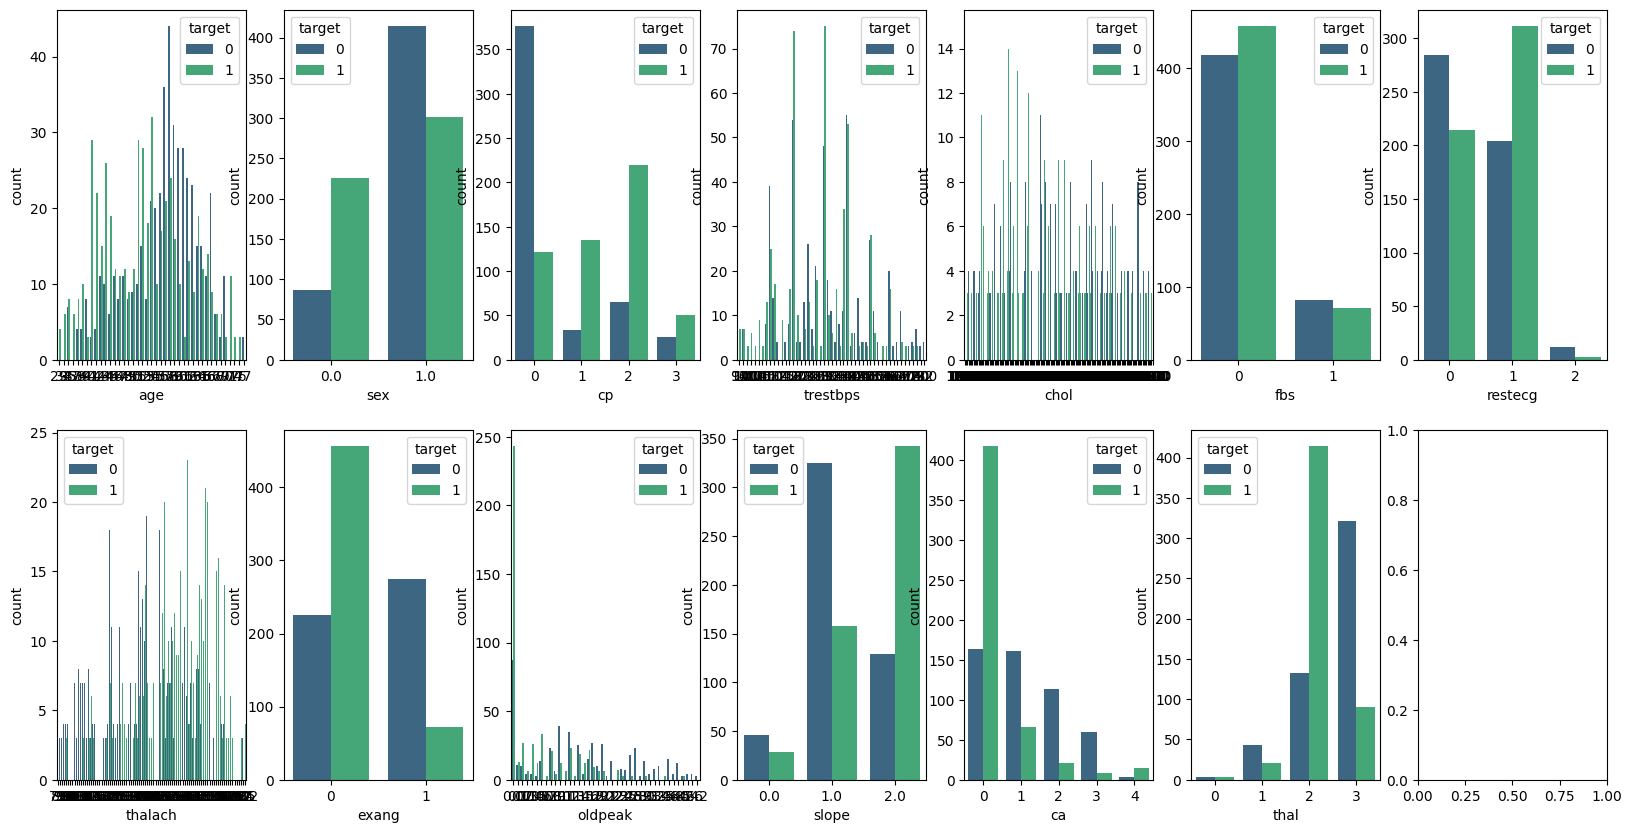

In [51]:
fig, subplot_matrix = plt.subplots(2, 7, figsize=(20, 10))
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
row_index = 0
column_index = 0

# Plotting countplots for each significant feature
for feature in selected_features:
    sns.countplot(x=feature, data=data, hue='target', ax=subplot_matrix[row_index, column_index], palette='viridis')
    column_index += 1
    if column_index == 7:
        column_index = 0
        row_index += 1

# plt.savefig('visualization.png')
plt.show()


We will take columns with unique values more than 6 and plot the rowsto boxplot to see if we have too many detached values that will hamper the result of our training model.

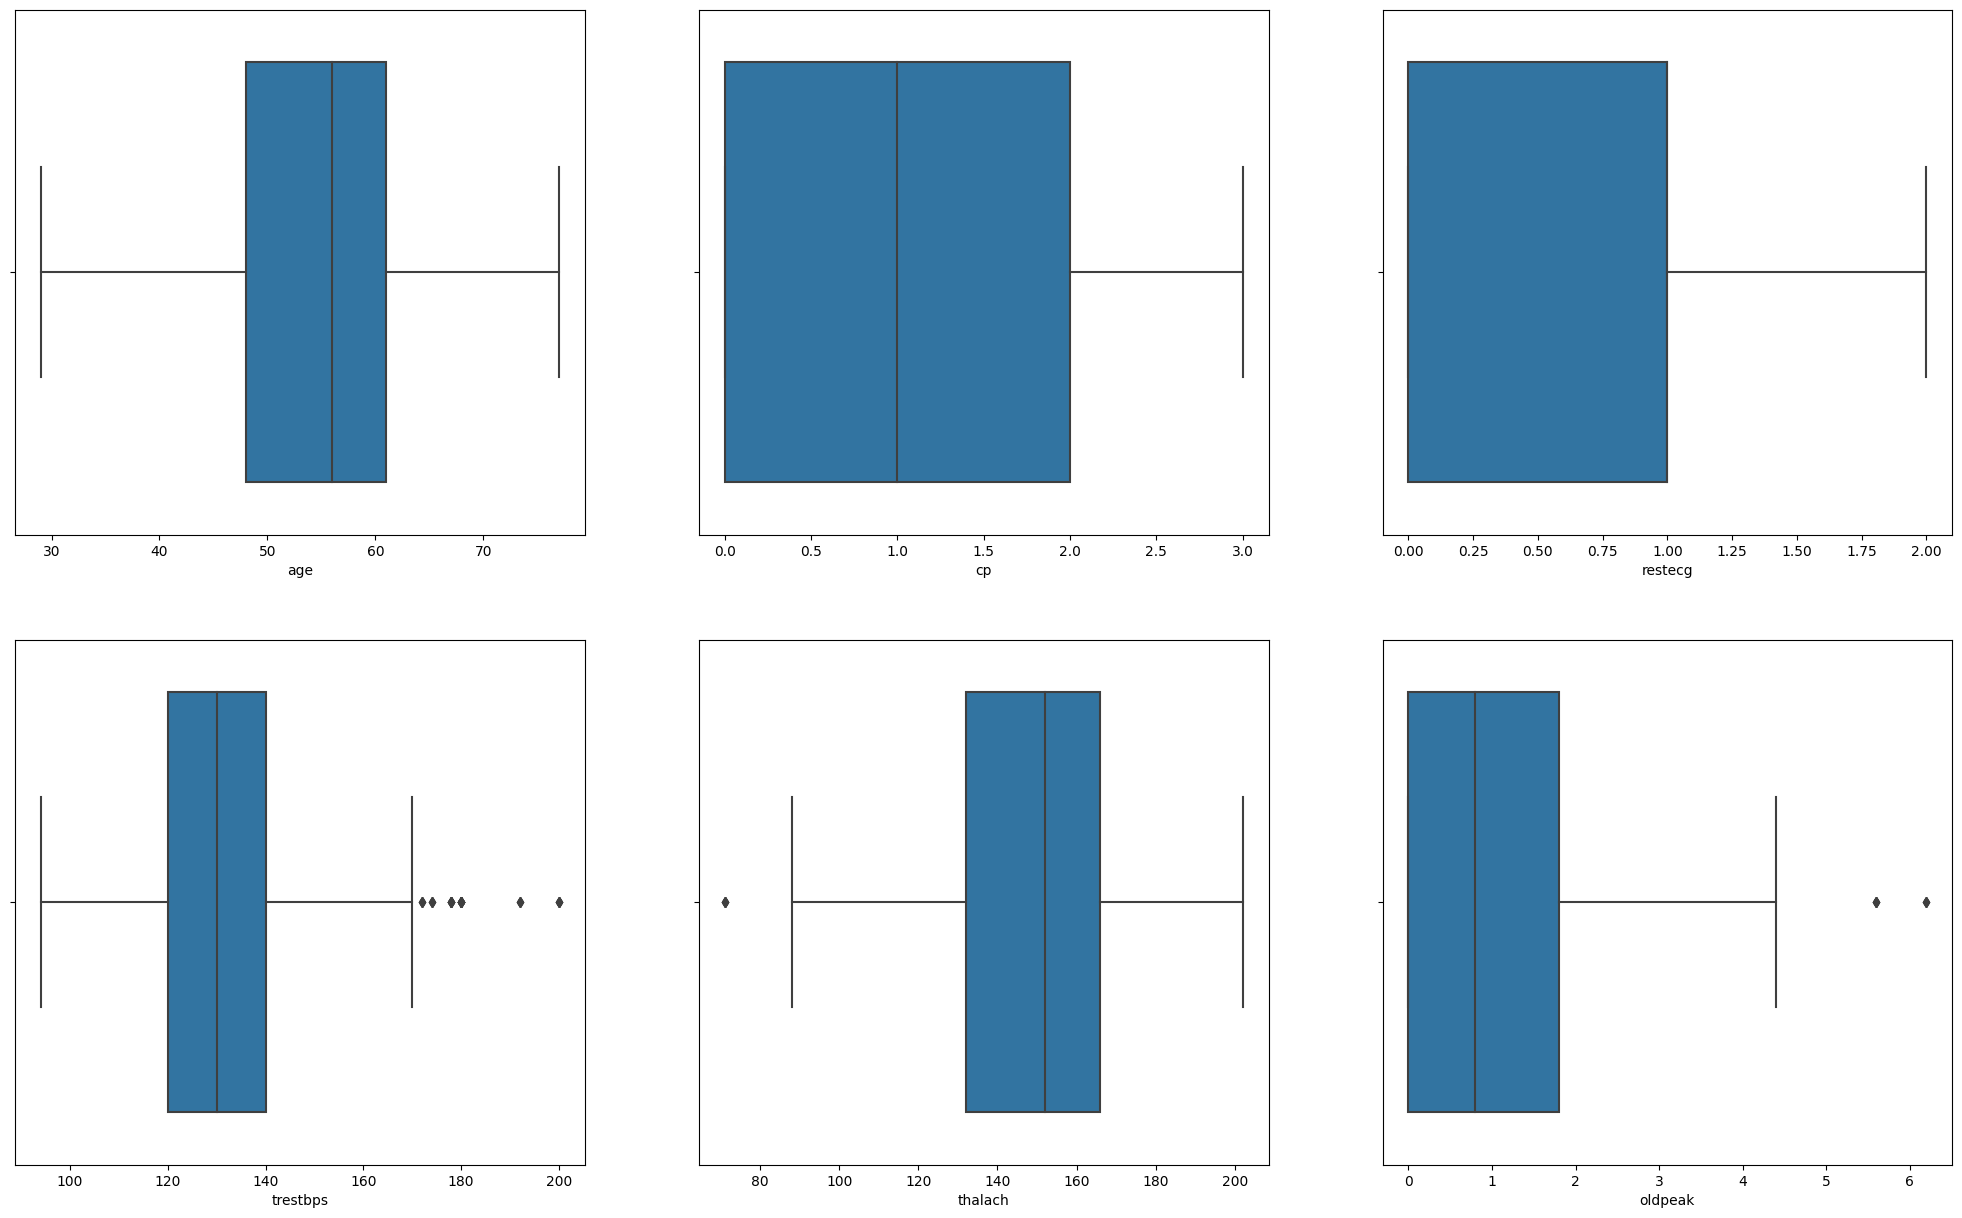

In [54]:
selected_features = ['age', 'cp', 'restecg', 'trestbps', 'thalach', 'oldpeak']
fig, subplot_matrix = plt.subplots(2, 3, figsize=(25, 15))
row_index = 0
column_index = 0

for feature in selected_features:
    sns.boxplot(data=data, x=feature, ax=subplot_matrix[row_index, column_index])
    column_index += 1
    if column_index == 3:
        column_index = 0
        row_index += 1
plt.show()



In [55]:
# Applying logarithm transformation to the 'trestbps' column
for column in ['trestbps']:
    # Add a small constant (e.g., 1) to avoid logarithm of zero and handle any potential negative values
    data[column] = np.log1p(data[column])


In [56]:
# Target variable
target_variable = data["target"]

# Features
features = data.drop('target', axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.30, random_state=0)



In [57]:
# Creating a StandardScaler instance
feature_scaler = StandardScaler()

# Scaling the training features
X_train_scaled = feature_scaler.fit_transform(X_train)

# Scaling the testing features
X_test_scaled = feature_scaler.transform(X_test)




Accuracy of Naive Bayes model: 86.73139158576052 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       145
           1       0.87      0.88      0.88       164

    accuracy                           0.87       309
   macro avg       0.87      0.87      0.87       309
weighted avg       0.87      0.87      0.87       309



<Axes: >

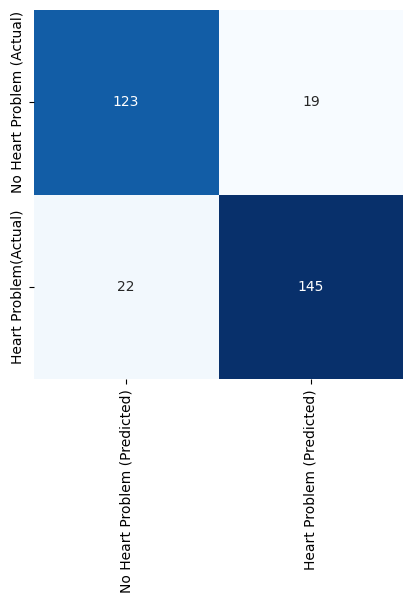

In [58]:
# Model 1: Naive Bayes
nb_model = GaussianNB()
nb_fit = nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_conf_matrix = confusion_matrix(nb_pred, y_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("\n")
print("Accuracy of Naive Bayes model:", nb_accuracy * 100, '\n')
print(classification_report(y_test, nb_pred))

# Plotting confusion matrix
sns.heatmap(nb_conf_matrix, xticklabels=["No Heart Problem (Predicted)","Heart Problem (Predicted)"],
            yticklabels=["No Heart Problem (Actual)","Heart Problem(Actual)"],
            square=True, annot=True, cmap='Blues', fmt='d', cbar=False)



Accuracy of Logistic Regression: 87.70226537216828 

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       145
           1       0.86      0.91      0.89       164

    accuracy                           0.88       309
   macro avg       0.88      0.87      0.88       309
weighted avg       0.88      0.88      0.88       309



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

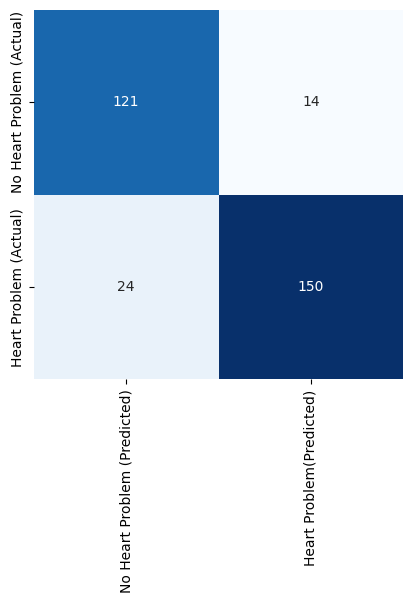

In [59]:
# Model 2: Logistic Regression
lr_model = LogisticRegression()
lr_fit = lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_conf_matrix = confusion_matrix(lr_pred, y_test)
lr_acc = accuracy_score(y_test, lr_pred)

print("\n")
print("Accuracy of Logistic Regression:", lr_acc * 100, '\n')
print(classification_report(y_test, lr_pred))
sns.heatmap(lr_conf_matrix, xticklabels=["No Heart Problem (Predicted)","Heart Problem(Predicted)"],
            yticklabels=["No Heart Problem (Actual)","Heart Problem (Actual)"],
            square=True, annot=True, cmap='Blues', fmt='d', cbar=False)





Accuracy of K-Neighbors Classifier: 74.4336569579288 

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       145
           1       0.78      0.72      0.75       164

    accuracy                           0.74       309
   macro avg       0.75      0.75      0.74       309
weighted avg       0.75      0.74      0.74       309



<Axes: >

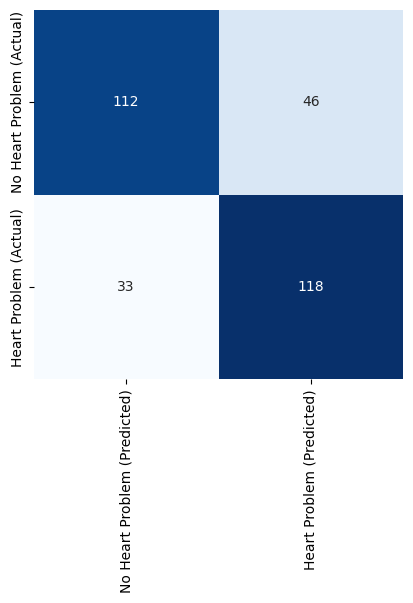

In [60]:
# Model 3: K-Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_fit = knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_conf_matrix = confusion_matrix(knn_pred, y_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("\n")
print("Accuracy of K-Neighbors Classifier:", knn_accuracy * 100, '\n')
print(classification_report(y_test, knn_pred))

# Plotting confusion matrix
sns.heatmap(knn_conf_matrix, xticklabels=["No Heart Problem (Predicted)","Heart Problem (Predicted)"],
            yticklabels=["No Heart Problem (Actual)","Heart Problem (Actual)"],
            square=True, annot=True, cmap='Blues', fmt='d', cbar=False)




Accuracy of Random Forest Classifier: 93.20388349514563 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       145
           1       0.93      0.94      0.94       164

    accuracy                           0.93       309
   macro avg       0.93      0.93      0.93       309
weighted avg       0.93      0.93      0.93       309



<Axes: >

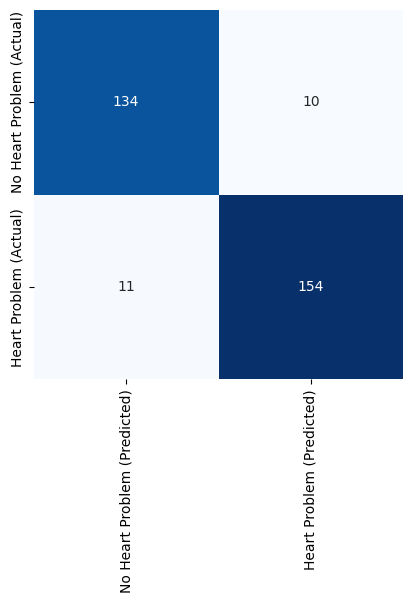

In [61]:
# Model 4: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf_fit = rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_conf_matrix = confusion_matrix( rf_pred, y_test)
# rf_training_accuracy = accuracy_score(X_train,y_train)
# print(rf_training_accuracy)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("\n")
print("Accuracy of Random Forest Classifier:", rf_accuracy * 100, '\n')
print(classification_report(y_test, rf_pred))

# Plotting confusion matrix
sns.heatmap(rf_conf_matrix, xticklabels=["No Heart Problem (Predicted)","Heart Problem (Predicted)"],
            yticklabels=["No Heart Problem (Actual)","Heart Problem (Actual)"],
            square=True, annot=True, cmap='Blues', fmt='d', cbar=False)